# Experimental data for Homework 4

Dhamma Kimpara and Sam Zhang

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import generator as gen
import optimizer as opt
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kappa = 100
n = 20
d = 5
A = gen.generate_A(n, d)
alpha = 0.9
sigma0 = 1
sigma1 = 0.1
sigma2 = 2.0

tracking_errs0 = opt.gradient_descent_experiment(A, alpha, n, d, sigma0, iters=50, projected=False)
tracking_errs1 = opt.gradient_descent_experiment(A, alpha, n, d, sigma1, iters=50, projected=False)
tracking_errs2 = opt.gradient_descent_experiment(A, alpha, n, d, sigma2, iters=50, projected=False)
tracking_errs_proj = opt.gradient_descent_experiment(A, alpha, n, d, sigma0, iters=50, projected=True)

In [4]:
rho = max([np.abs(1 - alpha/np.sqrt(kappa)), np.abs(1 - alpha)])
err0 = np.linalg.norm(tracking_errs0[0])
err1 = np.linalg.norm(tracking_errs1[0])
err2 = np.linalg.norm(tracking_errs2[0])
err_proj = np.linalg.norm(tracking_errs_proj[0])


bounds0 = [rho**t * err0 + sigma0 * (1 - rho**t)/(1-rho) for t in range(len(tracking_errs0))]
bounds1 = [rho**t * err1 + sigma1 * (1 - rho**t)/(1-rho) for t in range(len(tracking_errs1))]
bounds2 = [rho**t * err2 + sigma2 * (1 - rho**t)/(1-rho) for t in range(len(tracking_errs2))]

bounds_proj = [rho**t * err_proj + sigma0 * (1 - rho**t)/(1-rho) for t in range(len(tracking_errs_proj))]

### Results for $\sigma=1$

Text(0, 0.5, '$||x_t - x_t^*||_2$')

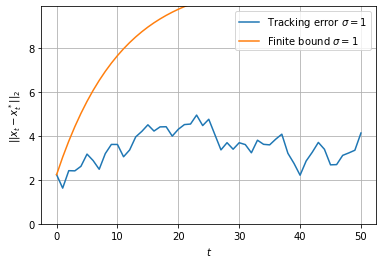

In [5]:
plt.plot(range(len(tracking_errs0)), tracking_errs0, label="Tracking error $\sigma = 1$")
plt.plot(range(len(tracking_errs0)), bounds0, label="Finite bound $\sigma = 1$")

#plt.axhline(1/(1-rho), linestyle='--', label="Asymptotic bound")
plt.grid()
plt.ylim([0, max(tracking_errs0)*2])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$||x_t - x_t^*||_2$")

### Results for $\sigma=0.1, \sigma=2$

Text(0, 0.5, '$||x_t - x_t^*||_2$')

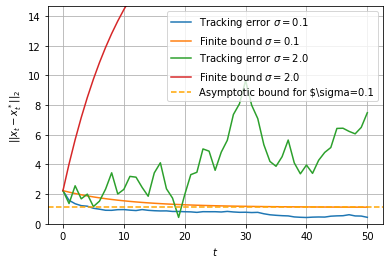

In [10]:
plt.plot(range(len(tracking_errs1)), tracking_errs1, label="Tracking error $\sigma = 0.1$")
plt.plot(range(len(tracking_errs1)), bounds1, label="Finite bound $\sigma = 0.1$")

plt.plot(range(len(tracking_errs1)), tracking_errs2, label="Tracking error $\sigma = 2.0$")
plt.plot(range(len(tracking_errs1)), bounds2, label="Finite bound $\sigma = 2.0$")

plt.axhline(sigma1/(1-rho), linestyle='--', c='orange', label="Asymptotic bound for $\sigma=0.1")
plt.grid()
plt.ylim([0, max(tracking_errs2)+5])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$||x_t - x_t^*||_2$")

### Results for projected GD

Text(0, 0.5, '$||x_t - x_t^*||_2$')

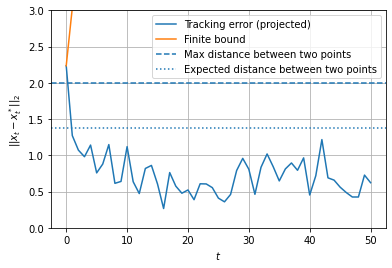

In [7]:
plt.plot(range(len(tracking_errs_proj)), tracking_errs_proj, label="Tracking error (projected)")
plt.plot(range(len(tracking_errs_proj)), bounds_proj, label="Finite bound")
#plt.axhline(1/(1-rho), linestyle='--', label="Asymptotic bound")
plt.axhline(2, linestyle='--', label="Max distance between two points")
plt.axhline(1.3796796759881553, linestyle=':', label="Expected distance between two points")
plt.grid()
plt.ylim([0, 3])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$||x_t - x_t^*||_2$")